<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/are_we_towards_ai_ml_era.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("/content/drive/My Drive/developerProjects/pandas/dataset/World Development Indicators/Indicators.csv")
data.shape

(5656458, 6)

In [11]:
countries = pd.read_csv('/content/drive/My Drive/developerProjects/pandas/dataset/World Development Indicators/Country.csv') 
countries.shape

(247, 31)

In [12]:
# the group of countries
countries[countries['CurrencyUnit'].isnull()].head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
7,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,CSS,Caribbean small states,Caribbean small states,Caribbean small states,S3,NaN,Caribbean small states aggregate. Includes Ant...,NaN,NaN,S3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,CEB,Central Europe and the Baltics,Central Europe and the Baltics,Central Europe and the Baltics,B8,NaN,Central Europe and the Baltics aggregate.,NaN,NaN,B8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# creation of a series for the countries only
sr_countries_only = countries[countries['CurrencyUnit'].isnull()==False]['CountryCode']

In [14]:
# filter of counties
filterCountry = (data['CountryCode'].isin(sr_countries_only))

In [15]:
# countries data
dataCountries= data[filterCountry]

In [16]:
dataCountries.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.453210e+02
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.171773e+01
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.086254e+00
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.663147e+01
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07


In [17]:
dataCountries.loc[filterCountry,'ID']=dataCountries.loc[filterCountry,'CountryCode']+dataCountries.loc[filterCountry,'Year'].map(str)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
dataCountries['ID'].isnull().any()

False

In [19]:
pd.crosstab(dataCountries['ID'].isnull(),dataCountries['CountryCode'].isnull())

CountryCode,False
ID,
False,4926334


In [20]:
dataCountries.loc[:,'CNT'] = 1
#del dataCountries['CNT']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
dataCountries.loc[:5,'CNT']

Series([], Name: CNT, dtype: int64)

In [22]:
# checking if the length of all the country code is 3
tmp = pd.DataFrame({'lng':dataCountries['CountryCode'].str.len()})
tmp['cnt'] = 1
tmp.groupby('lng').sum()

,cnt
lng,
3,4926334


In [23]:
dataCountries[dataCountries['IndicatorCode']=='NY.GDP.MKTP.KN'].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,ID,CNT
3692,Algeria,DZA,GDP (constant LCU),NY.GDP.MKTP.KN,1960,6.367232e+10,DZA1960,1
4003,Argentina,ARG,GDP (constant LCU),NY.GDP.MKTP.KN,1960,2.020554e+11,ARG1960,1
4245,Australia,AUS,GDP (constant LCU),NY.GDP.MKTP.KN,1960,2.469780e+11,AUS1960,1
4426,Austria,AUT,GDP (constant LCU),NY.GDP.MKTP.KN,1960,6.963953e+10,AUT1960,1
4576,"Bahamas, The",BHS,GDP (constant LCU),NY.GDP.MKTP.KN,1960,1.477690e+09,BHS1960,1


In [24]:
GDP_lcu = dataCountries[dataCountries['IndicatorCode']=='NY.GDP.MKTP.KN'][['ID','Value']]
GDP_lcu.head()

,ID,Value
3692,DZA1960,6.367232e+10
4003,ARG1960,2.020554e+11
4245,AUS1960,2.469780e+11
4426,AUT1960,6.963953e+10
4576,BHS1960,1.477690e+09


In [25]:
GDP_lcu.columns=['ID', 'GDP_lcu']

In [26]:
GDP_lcu.shape

(8616, 2)

In [27]:
dataCountries.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,ID,CNT
3492,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.453210e+02,AFG1960,1
3493,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.171773e+01,AFG1960,1
3494,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.086254e+00,AFG1960,1
3495,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,7.663147e+01,AFG1960,1
3496,Afghanistan,AFG,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,4.000000e+07,AFG1960,1


In [28]:
# gdp per capita in usd
GDP_perCapita = dataCountries[dataCountries['IndicatorCode']=='NY.GDP.PCAP.KD'][['ID','Value']]
GDP_perCapita.columns=['ID', 'GDP_perCapita']
GDP_perCapita.shape

(8385, 2)

In [29]:
GDP_perCapita.head()

,ID,GDP_perCapita
3697,DZA1960,1789.848105
4007,ARG1960,3698.155770
4250,AUS1960,13479.859543
4431,AUT1960,11253.280719
4581,BHS1960,13380.890203


In [30]:
# Labour
labour = dataCountries[dataCountries['IndicatorCode']=='SL.TLF.TOTL.IN'][['ID','Value']]
labour.columns=['ID', 'labour']
labour.shape

(4647, 2)

In [31]:
labour.head()

,ID,labour
1896194,AFG1990,3083498.0
1896573,ALB1990,1420090.0
1897086,DZA1990,6210711.0
1897958,AGO1990,4118283.0
1898822,ARG1990,13330838.0


In [32]:
# capital
capital = dataCountries[dataCountries['IndicatorCode']=='NE.GDI.TOTL.KN'][['ID','Value']]
capital.columns=['ID', 'capital']
capital.shape

(5766, 2)

In [33]:
capital.head()

,ID,capital
3715,DZA1960,1.875714e+10
4021,ARG1960,4.813631e+10
4268,AUS1960,3.776900e+10
4727,BGD1960,1.933742e+10
5162,BEN1960,7.867832e+10


In [34]:
# population
population = dataCountries[dataCountries['IndicatorCode']=='SP.POP.TOTL'][['ID','Value']]
population.columns=['ID', 'population']
population.shape

(11669, 2)

In [35]:
population.head()

,ID,population
3593,AFG1960,8994793.0
3641,ALB1960,1608800.0
3813,DZA1960,11124892.0
3832,ASM1960,20012.0
3844,ADO1960,13414.0


In [36]:
consumption=dataCountries[dataCountries['IndicatorCode']=='NE.CON.TETC.CD'][['ID','Value']]
consumption.columns=['ID', 'consumption']
consumption.shape

(7398, 2)

In [37]:
consumption.head()

,ID,consumption
3519,AFG1960,4.666666e+08
3691,DZA1960,2.340037e+09
4241,AUS1960,1.290402e+10
4712,BGD1960,3.950699e+09
5136,BEN1960,2.138937e+08


In [38]:
dataModel = GDP_lcu
dataModel =  pd.merge(dataModel, GDP_perCapita, on='ID', how='inner')

In [40]:
dataModel.shape

(8383, 3)

In [41]:
dataModel =  pd.merge(dataModel, labour, on='ID', how='inner')
dataModel.shape

(4291, 4)

In [42]:
dataModel =  pd.merge(dataModel, capital, on='ID', how='inner')
dataModel.shape

(3462, 5)

In [43]:
dataModel =  pd.merge(dataModel, population, on='ID', how='inner')
dataModel.shape

(3462, 6)

In [44]:
dataModel =  pd.merge(dataModel, consumption, on='ID', how='inner')
dataModel.shape

(3452, 7)

In [45]:
dataModel.head()

,ID,GDP_lcu,GDP_perCapita,labour,capital,population,consumption
0,DZA1990,2.134984e+11,2576.611414,6210711.0,5.906680e+10,25912364.0,4.523331e+10
1,ARG1990,3.398772e+11,3918.892827,13330838.0,4.563527e+10,32729740.0,1.134703e+11
2,ARM1990,1.182736e+12,1146.308067,1680806.0,1.176414e+12,3544695.0,1.448486e+09
3,AUS1990,7.610230e+11,25012.684032,8502257.0,1.550270e+11,17065100.0,2.269781e+11
4,AUT1990,1.958665e+11,29052.353067,3545731.0,5.210465e+10,7677850.0,1.216217e+11


In [46]:
dataModel['Year'] = pd.to_numeric(dataModel['ID'].str.slice(3, 7)) 

In [47]:
dataModel.head()

,ID,GDP_lcu,GDP_perCapita,labour,capital,population,consumption,Year
0,DZA1990,2.134984e+11,2576.611414,6210711.0,5.906680e+10,25912364.0,4.523331e+10,1990
1,ARG1990,3.398772e+11,3918.892827,13330838.0,4.563527e+10,32729740.0,1.134703e+11,1990
2,ARM1990,1.182736e+12,1146.308067,1680806.0,1.176414e+12,3544695.0,1.448486e+09,1990
3,AUS1990,7.610230e+11,25012.684032,8502257.0,1.550270e+11,17065100.0,2.269781e+11,1990
4,AUT1990,1.958665e+11,29052.353067,3545731.0,5.210465e+10,7677850.0,1.216217e+11,1990


In [48]:
dataModel['CNT']=1

In [49]:
dataModel.groupby('Year').sum()['CNT']

Year
1990    111
1991    114
1992    116
1993    120
1994    123
1995    129
1996    130
1997    132
1998    133
1999    132
2000    141
2001    144
2002    145
2003    147
2004    148
2005    148
2006    151
2007    151
2008    151
2009    151
2010    154
2011    152
2012    148
2013    146
2014    135
Name: CNT, dtype: int64

In [50]:
dataModel.loc[:,'GDP_usd'] = dataModel['GDP_perCapita'] * dataModel['population']

In [51]:
dataModel.head()

,ID,GDP_lcu,GDP_perCapita,labour,capital,population,consumption,Year,CNT,GDP_usd
0,DZA1990,2.134984e+11,2576.611414,6210711.0,5.906680e+10,25912364.0,4.523331e+10,1990,1,6.676609e+10
1,ARG1990,3.398772e+11,3918.892827,13330838.0,4.563527e+10,32729740.0,1.134703e+11,1990,1,1.282643e+11
2,ARM1990,1.182736e+12,1146.308067,1680806.0,1.176414e+12,3544695.0,1.448486e+09,1990,1,4.063312e+09
3,AUS1990,7.610230e+11,25012.684032,8502257.0,1.550270e+11,17065100.0,2.269781e+11,1990,1,4.268440e+11
4,AUT1990,1.958665e+11,29052.353067,3545731.0,5.210465e+10,7677850.0,1.216217e+11,1990,1,2.230596e+11


In [56]:
dataModel.head()

,ID,GDP_lcu,GDP_perCapita,labour,capital,population,consumption,Year,CNT,GDP_usd,Production_usd
0,DZA1990,2.134984e+11,2576.611414,6210711.0,5.906680e+10,25912364.0,4.523331e+10,1990,1,6.676609e+10,1.119994e+11
1,ARG1990,3.398772e+11,3918.892827,13330838.0,4.563527e+10,32729740.0,1.134703e+11,1990,1,1.282643e+11,2.417347e+11
2,ARM1990,1.182736e+12,1146.308067,1680806.0,1.176414e+12,3544695.0,1.448486e+09,1990,1,4.063312e+09,5.511798e+09
3,AUS1990,7.610230e+11,25012.684032,8502257.0,1.550270e+11,17065100.0,2.269781e+11,1990,1,4.268440e+11,6.538220e+11
4,AUT1990,1.958665e+11,29052.353067,3545731.0,5.210465e+10,7677850.0,1.216217e+11,1990,1,2.230596e+11,3.446813e+11


In [57]:
dataModel.loc[:,'Production_usd'] = dataModel['GDP_usd'] + dataModel['consumption']

In [58]:
dataModel.head()

,ID,GDP_lcu,GDP_perCapita,labour,capital,population,consumption,Year,CNT,GDP_usd,Production_usd
0,DZA1990,2.134984e+11,2576.611414,6210711.0,5.906680e+10,25912364.0,4.523331e+10,1990,1,6.676609e+10,1.119994e+11
1,ARG1990,3.398772e+11,3918.892827,13330838.0,4.563527e+10,32729740.0,1.134703e+11,1990,1,1.282643e+11,2.417347e+11
2,ARM1990,1.182736e+12,1146.308067,1680806.0,1.176414e+12,3544695.0,1.448486e+09,1990,1,4.063312e+09,5.511798e+09
3,AUS1990,7.610230e+11,25012.684032,8502257.0,1.550270e+11,17065100.0,2.269781e+11,1990,1,4.268440e+11,6.538220e+11
4,AUT1990,1.958665e+11,29052.353067,3545731.0,5.210465e+10,7677850.0,1.216217e+11,1990,1,2.230596e+11,3.446813e+11


In [59]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import mean_squared_error
# from math import sqrt

In [60]:
# getting the unique years from the DataFrame dataModel
nda_years=pd.unique(dataModel['Year'])

In [61]:
# creating an empty dataframe
elasticities=pd.DataFrame(columns=['Year', 'ElasticityLabour','ElasticityCapital'])
elasticities.head()

,Year,ElasticityLabour,ElasticityCapital


In [62]:
features=['labour','Capital_usd']
target=['Production_usd']
dataModel.shape

(3452, 11)

In [63]:
dataModel.to_csv('dataModel-all-years.csv',sep=',') # some negative values were identified for the capital (6 observations).
    # these negative observations will be deleted.

In [65]:
dataModel.shape

(3452, 11)

In [67]:
elasticities

,Year,ElasticityLabour,ElasticityCapital
0,1990,NaN,NaN


In [68]:
elasticities.index= elasticities['Year'].values

In [69]:
elasticities

,Year,ElasticityLabour,ElasticityCapital
1990,1990,NaN,NaN


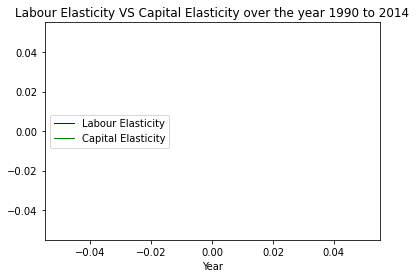

In [70]:
plt.plot(elasticities['Year'], elasticities['ElasticityLabour'], color='blue', linewidth=1, label='Labour Elasticity')
plt.plot(elasticities['Year'], elasticities['ElasticityCapital'], color='green', linewidth=1, label='Capital Elasticity')
plt.xlabel('Year')
#plt.ylabel('Elasticities (%)')
plt.title('Labour Elasticity VS Capital Elasticity over the year 1990 to 2014')
plt.legend(loc='center left')
plt.show()